In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.metrics import accuracy_score


In [2]:
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":  
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename

In [3]:
filename=get_path("/kaggle/input/fram-data-set/fram1.txt") 
fram=pd.read_csv(filename, sep="\t")
print(fram.describe())

                ID          AGE          FRW          SBP       SBP10  \
count  1394.000000  1394.000000  1394.000000  1394.000000  767.000000   
mean   4737.184362    52.431133   105.365136   148.086083  148.040417   
std    1073.406896     4.781507    17.752489    28.022062   25.706664   
min    1070.000000    45.000000    52.000000    90.000000   94.000000   
25%    3890.250000    48.000000    94.000000   130.000000  130.000000   
50%    4821.000000    52.000000   103.000000   142.000000  145.000000   
75%    5641.750000    56.000000   114.000000   160.000000  160.000000   
max    6442.000000    62.000000   222.000000   300.000000  264.000000   

               DBP         CHOL          CIG          CHD        DEATH  \
count  1394.000000  1394.000000  1394.000000  1394.000000  1394.000000   
mean     90.135581   234.644907     8.029412     1.187948     1.700861   
std      14.226235    46.303822    11.584138     2.615976     3.203132   
min      50.000000    96.000000     0.000000  

In [4]:
#Normalizing
def rescale(Series):
    mean = Series.mean()
    sigma = Series.std()
    rescaled_series = (Series - mean) / (2 * sigma)
    return rescaled_series


In [5]:

fram_scaled = fram.select_dtypes(include='number').apply(rescale).add_prefix('s')
fram = pd.concat([fram, fram_scaled], axis=1)
print(fram.head())

     ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...      sAGE  \
0  4988  female   57  135  186    NaN  120   150    0    1  ...  0.477764   
1  3001  female   60  123  165    NaN  100   167   25    0  ...  0.791473   
2  5079  female   54  115  140    NaN   90   213    5    0  ...  0.164056   
3  5162  female   52  102  170    NaN  104   280   15    0  ... -0.045083   
4  4672  female   45   99  185    NaN  105   326   20    0  ... -0.777070   

       sFRW      sSBP sSBP10      sDBP     sCHOL      sCIG      sCHD  \
0  0.834668  0.676501    NaN  1.049625 -0.914016 -0.346569 -0.035923   
1  0.496687  0.301796    NaN  0.346698 -0.730446  0.732493 -0.227056   
2  0.271367 -0.144281    NaN -0.004765 -0.233727 -0.130757 -0.227056   
3 -0.094779  0.391012    NaN  0.487283  0.489755  0.300868 -0.227056   
4 -0.179274  0.658658    NaN  0.522430  0.986475  0.516680 -0.227056   

     sDEATH  sYRS_DTH  
0  0.827181 -0.665514  
1  1.295472  0.099516  
2  0.983278 -0.410504  
3  0.827

#### Model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables

In [6]:
formula = 'SBP ~ sFRW + sCHOL + SEX'
fit = smf.ols(formula=formula,data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           4.13e-40
Time:                        13:46:38   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

#### Model that predicts systolic blood pressure using weight,age, gender, and cholesterol level as explanatory variables

In [7]:
formula = 'SBP ~ sFRW + sCHOL + SEX +sAGE'
fit = smf.ols(formula=formula,data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           2.44e-46
Time:                        13:46:38   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

#### Some explanation of the results
Model without age:
R-squared = 0.125
Adj. R-squared = 0.123
Model with age (second model):
R-squared = 0.146
Adj. R-squared = 0.144

The inclusion of age increases the R-squared from 0.125 to 0.146 which is 2.1% increase. Adding age provides some improvement in the model's ability to explain the variance in SBP.

    sFRW is the most influential variable in explaining SBP in both models.
    
    sAGE (age) increases the explanatory power of the model, but its effect is secondary to sFRW.
    
    sCHOL (cholesterol) also has a positive relationship with SBP, contributing some explanation but less than sFRW and sAGE.
    
    SEX (gender) explains a smaller portion of the variance, with males having lower SBP on average compared to females.


### Models with interactions

In [8]:
formula = 'SBP ~ sFRW + sCHOL + SEX + sAGE + sFRW:sCHOL + sFRW:SEX + sFRW:sAGE + sCHOL:SEX + sCHOL:sAGE + SEX:sAGE'
fit = smf.ols(formula=formula, data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           4.92e-43
Time:                        13:46:38   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

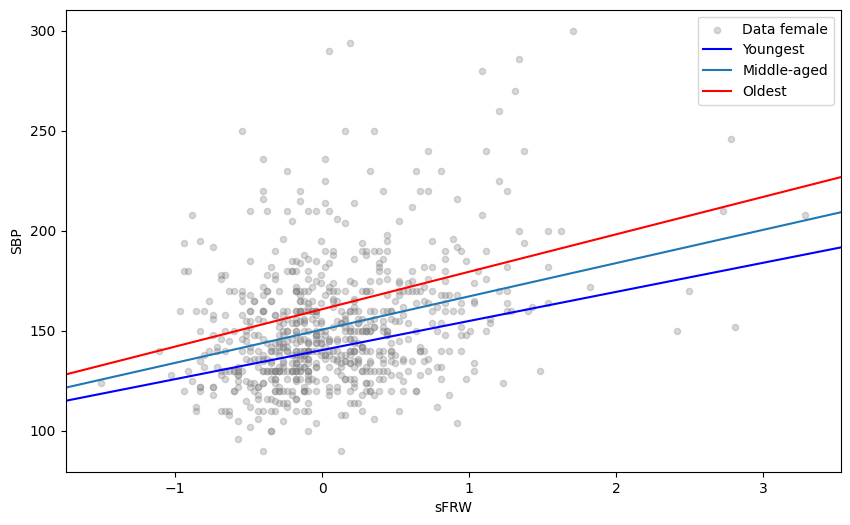

In [9]:
p = fit.params
fram[fram.SEX == "female"].plot.scatter("sFRW", "SBP", color="gray", alpha=0.3, label="Data female", figsize=(10, 6))
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW + p["sFRW:sAGE"], ax=plt.gca(), color="blue", label="Youngest")
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), label="Middle-aged")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW - p["sFRW:sAGE"], ax=plt.gca(), color="red", label="Oldest")
plt.legend()

As a person gets older, the dependence of blood pressure on weight becomes stronger. In other words, the rate at which blood pressure increases with weight is greater in older individuals compared to younger ones. 


In [10]:
fram["HIGH_BP"] = ((fram.SBP >= 140) | (fram.DBP >= 90)).astype(int)
formula = 'HIGH_BP ~ sFRW + SEX + sFRW:SEX'
fit = smf.logit(formula, data=fram).fit()
y_pred_prob = fit.predict(fram) 
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
error_rate_orig = np.mean(fram['HIGH_BP'] != y_pred)
print(f"Error Rate: {error_rate_orig:.4f}")


Optimization terminated successfully.
         Current function value: 0.614682
         Iterations 6
Error Rate: 0.3558


In [11]:
formula = 'HIGH_BP ~ sFRW + SEX + sAGE + sAGE:sFRW + sFRW:SEX + SEX:sAGE'
fit = smf.logit(formula, data=fram).fit()
y_pred_prob = fit.predict(fram)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
error_rate = np.mean(fram['HIGH_BP'] != y_pred)
print("Error rate:", error_rate)

Optimization terminated successfully.
         Current function value: 0.606533
         Iterations 6
Error rate: 0.3278335724533716


The second error rate (0.3278335724533716) is lower than the first error rate (0.3558). 
This means that the model in the second error rate is performing better. A lower error rate means that the model is making fewer incorrect predictions. In this case, the model with the error rate of 0.3278335724533716 is more accurate than the model with the error rate of 0.3558.

# Logistic regression

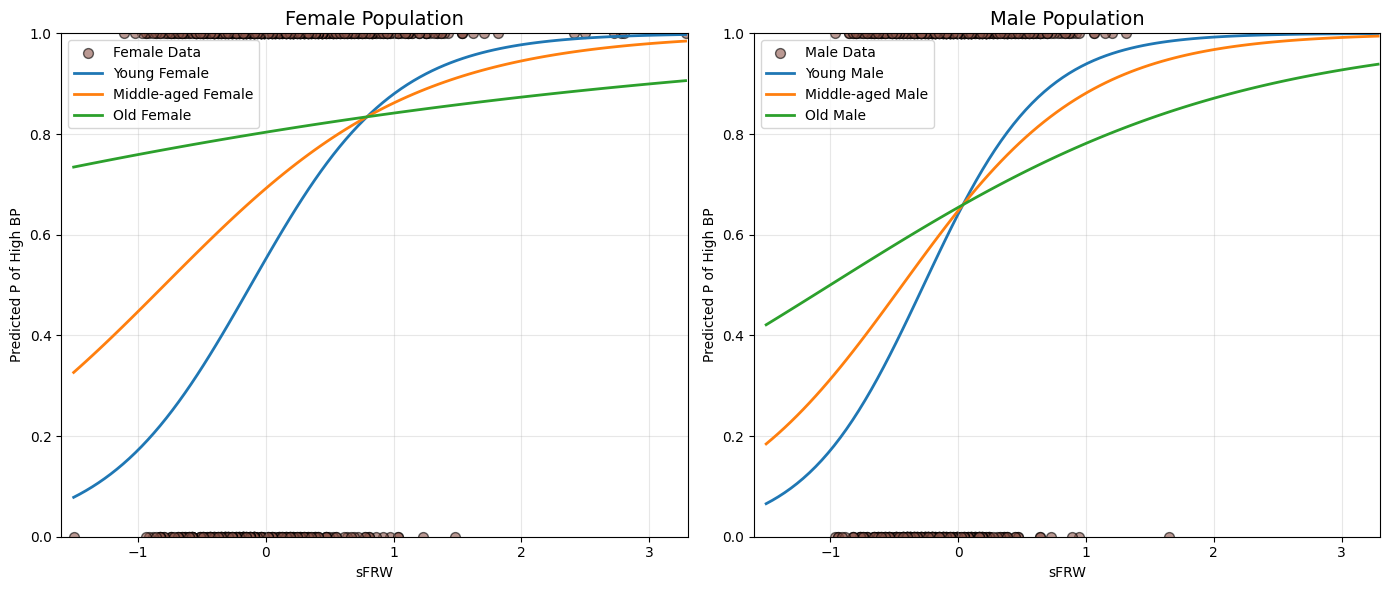

In [12]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))


sFRW_linespace = np.linspace(fram['sFRW'].min(), fram['sFRW'].max(), 100)

prediction_data = pd.DataFrame({
    'sFRW': np.tile(sFRW_linespace, 6),
    'sFRW_scaled': np.tile((sFRW_linespace - fram['sFRW'].mean()) / fram['sFRW'].std(), 6)
})

age_groups = [-1.0, 0.0, 1.0]  
sexes = ['female', 'male']

fig, ax = plt.subplots(1, 2, subplot_kw={"xlim": (-1.6, 3.3), "ylim": (0, 1),
                                         "xlabel": "sFRW", "ylabel": "Predicted P of High BP"},
                       figsize=(14, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  

for i, sex in enumerate(sexes):

    ax[i].scatter(fram.sFRW[fram.SEX == sex], 
                  fram.HIGH_BP[fram.SEX == sex], 
                  alpha=0.6, 
                  s=50,  
                  label=f"{sex.capitalize()} Data", 
                  edgecolor='k', 
                  color='#8c564b')  
    
    for j, age in enumerate(age_groups):
       
        prediction_data['sAGE'] = age
        prediction_data['SEX'] = sex
        pred = fit.predict(prediction_data)
        subset_pred = pred[j * 100: (j + 1) * 100]

      
        ax[i].plot(sFRW_linespace, subset_pred, label=f"{['Young', 'Middle-aged', 'Old'][j]} {sex.capitalize()}", 
                   color=colors[j], linewidth=2)
    
 
    ax[i].set_title(f"{sex.capitalize()} Population", fontsize=14)
    ax[i].grid(alpha=0.3)
    ax[i].legend(loc='upper left', fontsize=10)

fig.tight_layout()
plt.show()

The curves for the younger individuals (both male and female)lie below the curves for the middle-aged individuals. At a given SFRW, younger individuals have a lower predicted probability of high blood pressure compared to middle-aged individuals. The curves for the middle-aged individuals generally lie below the curves for the older individuals.  Middle-aged individuals have a lower predicted probability of high blood pressure compared to older individuals at similar SFRW levels.


In [13]:
fram['hasCHD'] = (fram['CHD'] > 0).astype(int)

fit = smf.glm('hasCHD ~ sFRW + sCHOL + sCIG + sFRW:sCHOL + sFRW:sCIG + sCHOL:sCIG', data=fram, family=sm.families.Binomial()).fit()

test = {"CHOL": 200,"CIG": 17,"FRW": 100}
point = {"sCHOL": (test["CHOL"] - fram["CHOL"].mean()) / (2 * fram["CHOL"].std()),"sCIG": (test["CIG"] - fram["CIG"].mean()) / (2 * fram["CIG"].std()),"sFRW": (test["FRW"] - fram["FRW"].mean()) / (2 * fram["FRW"].std())}
X = (
    fit.params.Intercept +
    fit.params.sCHOL * point["sCHOL"] +
    fit.params.sCIG * point["sCIG"] +
    fit.params.sFRW * point["sFRW"] +
    fit.params["sFRW:sCHOL"] * point["sFRW"] * point["sCHOL"] +
    fit.params["sFRW:sCIG"] * point["sFRW"] * point["sCIG"] +
    fit.params["sCHOL:sCIG"] * point["sCHOL"] * point["sCIG"] 

)

predicted = logistic(X)
print("Predicted probability of CHD:", predicted)

Predicted probability of CHD: 0.21616166025041006


The predicted probability of CHD is 21.6%, indicating a moderate risk. This means that factors like cholesterol, smoking, and their interactions contribute to the likelihood of CHD(coronal heart disease). While not excessively high, this risk level warrants attention, potentially including lifestyle changes or medical evaluation to tone down CHD risk.